In this Project we are going to work on evaluting price of houses given the following features:

    1. Year of sale of the house
    2. The age of the house at the time of sale
    3. Distance from city center  
    4. Number of stores in the locality 
    5. The latitude 
    6. The Longitude 

In [9]:
# Import Library 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline


In [10]:
#Import the Data and read 
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [11]:
#Check Missing Data 
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [12]:
#Data Normalization 
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [13]:
#Convet Label value to original value 
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


In [14]:
#Create Train and Test Sets and feature and label 
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [15]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [16]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


In [18]:
#Create the Model 
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Model Training 
#We can use an `EarlyStopping` callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

8/8 [==============================] - 0s 3ms/step
Epoch 1/1000
149/149 [==============================] - 2s 5ms/step - loss: 0.9776 - val_loss: 0.8787
Epoch 2/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.9757 - val_loss: 0.8769
Epoch 3/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.9739 - val_loss: 0.8751
Epoch 4/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9721 - val_loss: 0.8734
Epoch 5/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9704 - val_loss: 0.8717
Epoch 6/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9687 - val_loss: 0.8700
Epoch 7/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9669 - val_loss: 0.8683
Epoch 8/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9652 - val_loss: 0.8666
Epoch 9/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.9635 - val_loss: 0.8649
Epoch 10/1000
149/149 [========

149/149 [==============================] - 0s 2ms/step - loss: 0.8523 - val_loss: 0.7582
Epoch 81/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8508 - val_loss: 0.7569
Epoch 82/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8494 - val_loss: 0.7555
Epoch 83/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8479 - val_loss: 0.7542
Epoch 84/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8465 - val_loss: 0.7528
Epoch 85/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.8450 - val_loss: 0.7514
Epoch 86/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8435 - val_loss: 0.7500
Epoch 87/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8421 - val_loss: 0.7487
Epoch 88/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8406 - val_loss: 0.7474
Epoch 89/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.8392 - v

149/149 [==============================] - 0s 2ms/step - loss: 0.7416 - val_loss: 0.6565
Epoch 160/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7402 - val_loss: 0.6553
Epoch 161/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7389 - val_loss: 0.6540
Epoch 162/1000
149/149 [==============================] - 1s 3ms/step - loss: 0.7375 - val_loss: 0.6528
Epoch 163/1000
149/149 [==============================] - 1s 3ms/step - loss: 0.7362 - val_loss: 0.6516
Epoch 164/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7348 - val_loss: 0.6503
Epoch 165/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7334 - val_loss: 0.6490
Epoch 166/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7321 - val_loss: 0.6478
Epoch 167/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.7307 - val_loss: 0.6466
Epoch 168/1000
149/149 [==============================] - 0s 3ms/step - loss: 0

Epoch 238/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6400 - val_loss: 0.5650
Epoch 239/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6388 - val_loss: 0.5639
Epoch 240/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6376 - val_loss: 0.5628
Epoch 241/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6363 - val_loss: 0.5617
Epoch 242/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6351 - val_loss: 0.5606
Epoch 243/1000
149/149 [==============================] - 1s 3ms/step - loss: 0.6339 - val_loss: 0.5595
Epoch 244/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6326 - val_loss: 0.5584
Epoch 245/1000
149/149 [==============================] - 1s 4ms/step - loss: 0.6314 - val_loss: 0.5573
Epoch 246/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.6302 - val_loss: 0.5563
Epoch 247/1000
149/149 [==============================] - 0s 2ms

Epoch 317/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.5465 - val_loss: 0.4843
Epoch 318/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.5454 - val_loss: 0.4833
Epoch 319/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.5443 - val_loss: 0.4824
Epoch 320/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.5432 - val_loss: 0.4814
Epoch 321/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.5420 - val_loss: 0.4804
Epoch 322/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.5409 - val_loss: 0.4795
Epoch 323/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.5398 - val_loss: 0.4785
Epoch 324/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.5387 - val_loss: 0.4776
Epoch 325/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.5376 - val_loss: 0.4766
Epoch 326/1000
149/149 [==============================] - 0s 2ms

Epoch 396/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.4628 - val_loss: 0.4132
Epoch 397/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4619 - val_loss: 0.4124
Epoch 398/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4609 - val_loss: 0.4116
Epoch 399/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4599 - val_loss: 0.4108
Epoch 400/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4589 - val_loss: 0.4099
Epoch 401/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4579 - val_loss: 0.4091
Epoch 402/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4569 - val_loss: 0.4083
Epoch 403/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4559 - val_loss: 0.4074
Epoch 404/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.4549 - val_loss: 0.4066
Epoch 405/1000
149/149 [==============================] - 0s 3ms

Epoch 475/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3916 - val_loss: 0.3538
Epoch 476/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3908 - val_loss: 0.3531
Epoch 477/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3900 - val_loss: 0.3525
Epoch 478/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3892 - val_loss: 0.3518
Epoch 479/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3884 - val_loss: 0.3512
Epoch 480/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3877 - val_loss: 0.3506
Epoch 481/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3869 - val_loss: 0.3499
Epoch 482/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3861 - val_loss: 0.3493
Epoch 483/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3853 - val_loss: 0.3486
Epoch 484/1000
149/149 [==============================] - 0s 2ms

Epoch 554/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3366 - val_loss: 0.3087
Epoch 555/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3360 - val_loss: 0.3082
Epoch 556/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3354 - val_loss: 0.3077
Epoch 557/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3348 - val_loss: 0.3072
Epoch 558/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3342 - val_loss: 0.3067
Epoch 559/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3336 - val_loss: 0.3062
Epoch 560/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3330 - val_loss: 0.3057
Epoch 561/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3324 - val_loss: 0.3052
Epoch 562/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.3318 - val_loss: 0.3047
Epoch 563/1000
149/149 [==============================] - 0s 2ms

Epoch 633/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2963 - val_loss: 0.2749
Epoch 634/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2959 - val_loss: 0.2746
Epoch 635/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2955 - val_loss: 0.2742
Epoch 636/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2951 - val_loss: 0.2738
Epoch 637/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2946 - val_loss: 0.2735
Epoch 638/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2942 - val_loss: 0.2731
Epoch 639/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2938 - val_loss: 0.2728
Epoch 640/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2934 - val_loss: 0.2724
Epoch 641/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2930 - val_loss: 0.2721
Epoch 642/1000
149/149 [==============================] - 0s 2ms

Epoch 712/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2682 - val_loss: 0.2513
Epoch 713/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2679 - val_loss: 0.2511
Epoch 714/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2676 - val_loss: 0.2508
Epoch 715/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2673 - val_loss: 0.2506
Epoch 716/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2670 - val_loss: 0.2504
Epoch 717/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2667 - val_loss: 0.2501
Epoch 718/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2664 - val_loss: 0.2499
Epoch 719/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2662 - val_loss: 0.2497
Epoch 720/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2659 - val_loss: 0.2494
Epoch 721/1000
149/149 [==============================] - 0s 2ms

Epoch 791/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2489 - val_loss: 0.2356
Epoch 792/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2487 - val_loss: 0.2354
Epoch 793/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2485 - val_loss: 0.2352
Epoch 794/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2483 - val_loss: 0.2351
Epoch 795/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2481 - val_loss: 0.2349
Epoch 796/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2479 - val_loss: 0.2348
Epoch 797/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2477 - val_loss: 0.2346
Epoch 798/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2475 - val_loss: 0.2344
Epoch 799/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2473 - val_loss: 0.2343
Epoch 800/1000
149/149 [==============================] - 0s 2ms

Epoch 870/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2353 - val_loss: 0.2244
Epoch 871/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2351 - val_loss: 0.2242
Epoch 872/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2350 - val_loss: 0.2241
Epoch 873/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2348 - val_loss: 0.2240
Epoch 874/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2347 - val_loss: 0.2239
Epoch 875/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2345 - val_loss: 0.2238
Epoch 876/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2344 - val_loss: 0.2236
Epoch 877/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2342 - val_loss: 0.2235
Epoch 878/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2341 - val_loss: 0.2234
Epoch 879/1000
149/149 [==============================] - 0s 3ms

Epoch 949/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2250 - val_loss: 0.2156
Epoch 950/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2249 - val_loss: 0.2155
Epoch 951/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2248 - val_loss: 0.2154
Epoch 952/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2246 - val_loss: 0.2153
Epoch 953/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2245 - val_loss: 0.2152
Epoch 954/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2244 - val_loss: 0.2151
Epoch 955/1000
149/149 [==============================] - 0s 3ms/step - loss: 0.2243 - val_loss: 0.2150
Epoch 956/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.2149
Epoch 957/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.2241 - val_loss: 0.2148
Epoch 958/1000
149/149 [==============================] - 0s 3ms

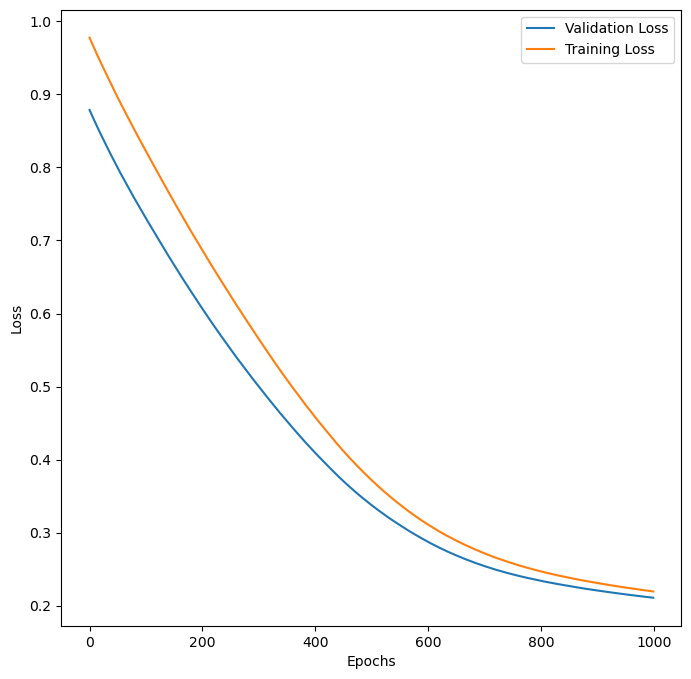

In [20]:
plot_loss(history)

8/8 [==============================] - 0s 3ms/step


C:\Users\Rushit\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


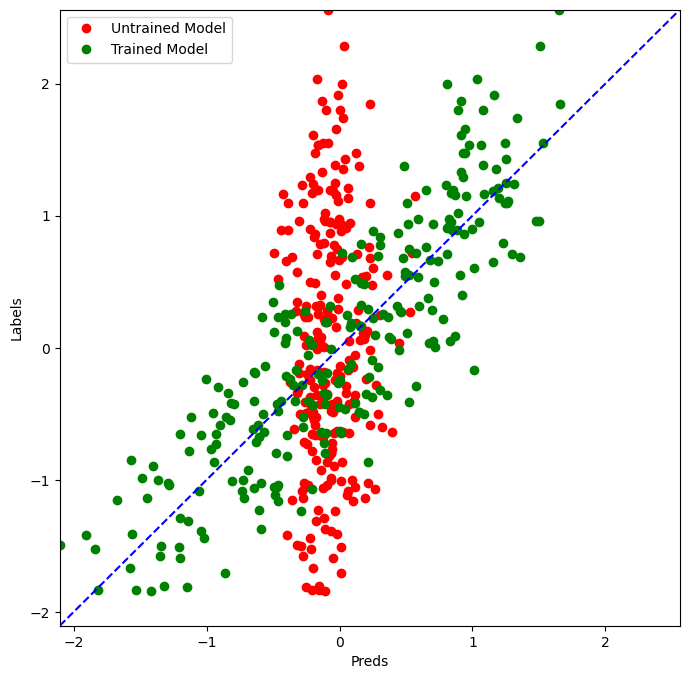

In [21]:
#Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

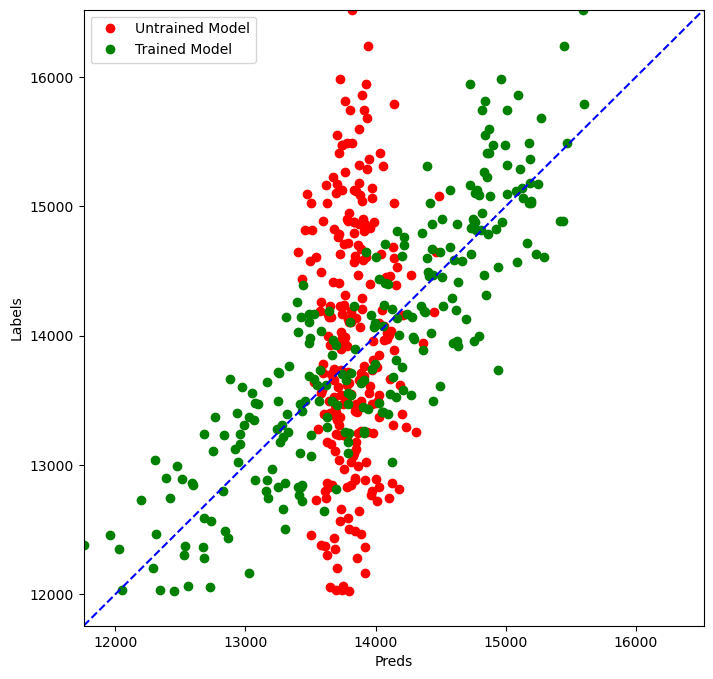

In [22]:
#Plot Price Predictions 
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)